    The Scikit image processing basics

In [13]:
#import numpy as np, from matplotlib.pyplot import *
%pylab inline
from osgeo import gdal
from skimage import io, filter, measure
from skimage.morphology import disk
from skimage.filter import rank

Populating the interactive namespace from numpy and matplotlib


In [15]:
#1. Open the dataset - GDAL will iterate through all drivers and use the first that works.
ds = gdal.Open('data/M3_4030seg_L2_aristcrater.tif')

#Visualize a band

<matplotlib.colorbar.Colorbar instance at 0x10ec0add0>

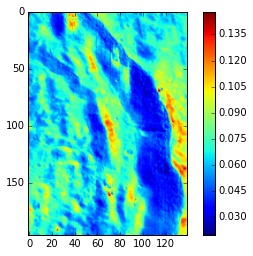

In [17]:
bnd = ds.GetRasterBand(1) #1 based
arr = bnd.ReadAsArray()
imshow(arr)
colorbar()

The defaul colorbar is the spectral one.  We can increase the figure size and get a grayscale colorbar easily.

# Colormaps
The rainbow colormap is very bad to use for quantitative data. It's bad for colorblind, it's bad for visual understanding of quantative range (yellows, for example), etc. The CubeHelix color map is designed to accurately protray quantitative data in an image map such that brighter colors mean higher numbers in the image.

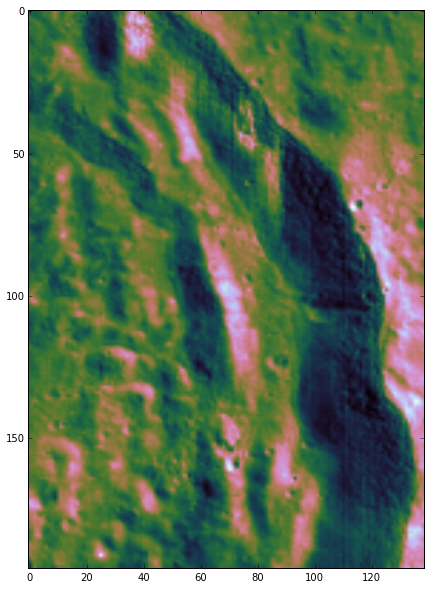

In [80]:
imshow(arr, cmap='cubehelix')

<matplotlib.colorbar.Colorbar instance at 0x10ef2e7e8>

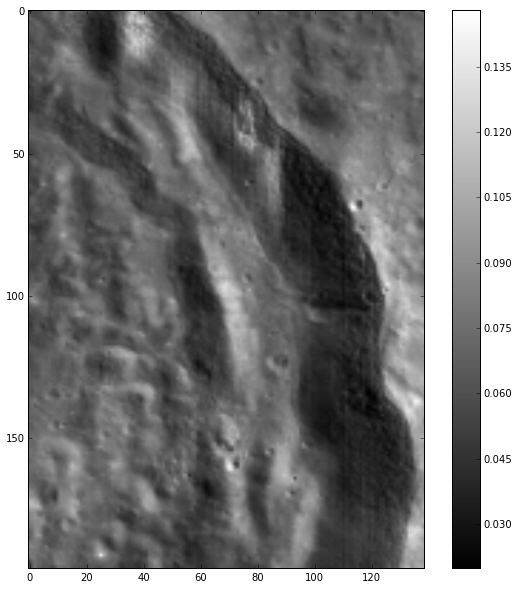

In [18]:
figsize(10,10)
arr = ds.GetRasterBand(1).ReadAsArray()  #Note the chained calls
imshow(arr, cmap='gray')
colorbar()

When the dataset is small enough to fit into memory, I find it easier to load the entire image and make a single GDAL call.

Masking on an image is easy.

In [19]:
mask = arr > 0.05

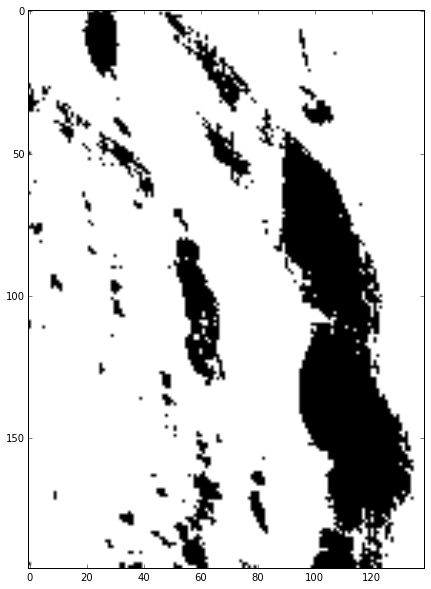

In [20]:
imshow(mask, cmap='gray')

In [21]:
arr_msk = mask * arr

<matplotlib.colorbar.Colorbar instance at 0x110bebc68>

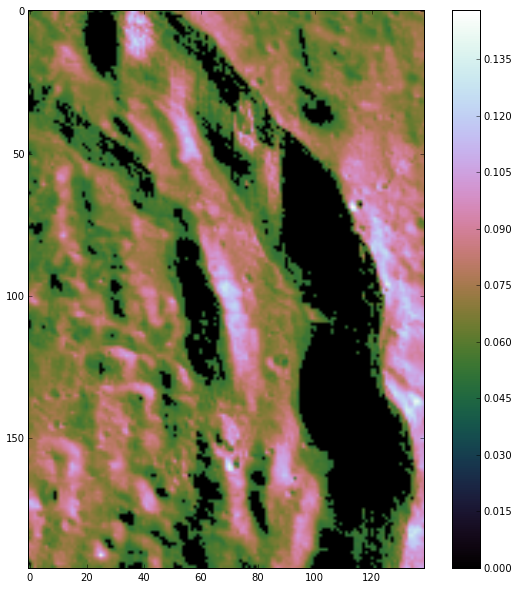

In [81]:
figsize(10,10)
imshow(arr_msk, cmap='cubehelix')
colorbar()

We can find and draw contours on images easily. 
plt.contour(image, [high, low])

<matplotlib.contour.QuadContourSet instance at 0x113bb9998>

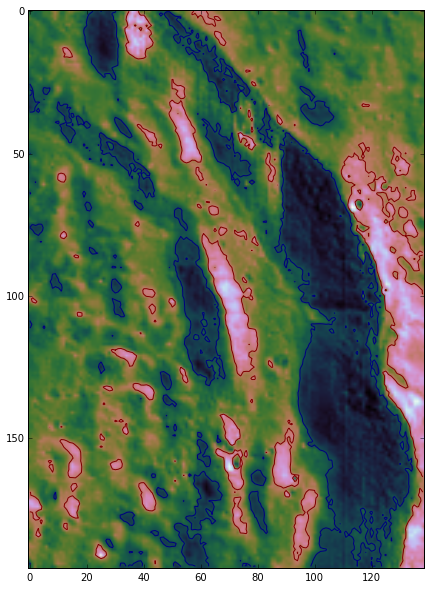

In [82]:
plt.figure()
plt.imshow(arr, cmap='cubehelix')
plt.contour(arr, [0.09,0.05])

In [86]:
arr16 = arr
selem = disk(3)

percentile_result = rank.mean_percentile(arr16, selem=selem, p0=.1, p1=.9)
percentile_result = percentile_result/percentile_result.mean() # Normalize
bilateral_result = rank.mean_bilateral(arr16, selem=selem, s0=500, s1=500)
bilateral_result = bilateral_result/bilateral_result.mean() # Normalize
normal_result = rank.mean(arr16, selem=selem)
normal_result = normal_result/normal_result.mean() # Normalize

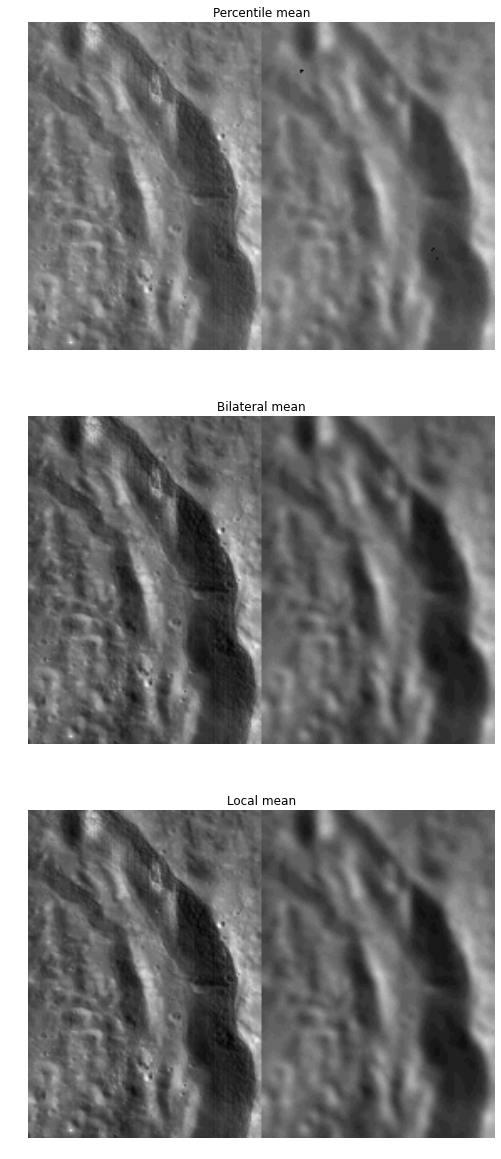

In [90]:
arr16 = arr16/arr16.mean() #Normalize so the display shows all data.
fig, axes = plt.subplots(nrows=3, figsize=(16, 20))
ax0, ax1, ax2 = axes

ax0.imshow(np.hstack((arr16, percentile_result)),cmap="gray")
ax0.set_title('Percentile mean')
ax0.axis('off')

ax1.imshow(np.hstack((arr16, bilateral_result)),cmap="gray")
ax1.set_title('Bilateral mean')
ax1.axis('off')

ax2.imshow(np.hstack((arr16, normal_result)),cmap="gray")
ax2.set_title('Local mean')
ax2.axis('off')

plt.show()

In [91]:
ceres = gdal.Open('images/Dawn_Ceres_PIA19563.tif')

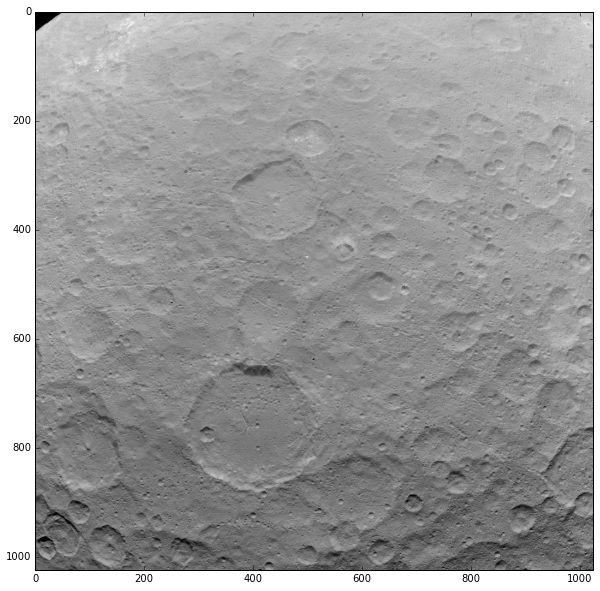

In [93]:
cbnd = ceres.GetRasterBand(1) #1 based
c_arr = cbnd.ReadAsArray()
imshow(c_arr,cmap="gray")

In [111]:
# Stretch the image scale

In [112]:
from skimage import exposure

In [136]:
p2, p97 = np.percentile(c_arr, (2, 97))
str_c_arr = exposure.rescale_intensity(c_arr, in_range=(p2,p97), out_range=(0,255)) 

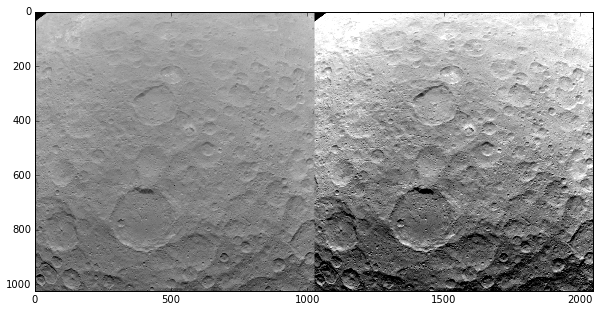

In [137]:
imshow(np.hstack((c_arr, str_c_arr)),cmap="gray")

In [ ]:
# Open ISIS Cube

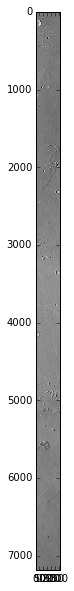

In [143]:
thms = gdal.Open('images/I02454003RDR.cub')
t_bnd = thms.GetRasterBand(1) #1 based
t_arr = t_bnd.ReadAsArray()
imshow(t_arr, cmap="gray")

In [172]:
t_arr_crop = t_arr[10:512,10:512]

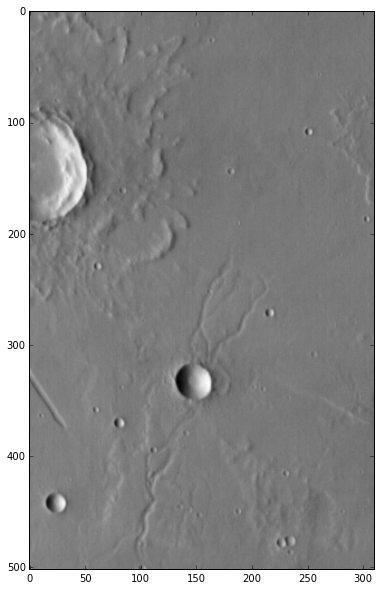

In [173]:
imshow(t_arr_crop, cmap="gray")